# Análise dados Enem 2019

<div style="text-align: justify"> 
A ideia deste post é elaborar uma análise dos dados do ENEM 2019 utilizando o python. Serão consideradas as notas somente dos alunos que não foram eliminados em nenhuma das 4 provas (Matemática, ciências humanas, ciências da natureza e linguagens e códigos) aplicadas. Feita esta seleção, será feita a análise descritiva dos dados. Serão analisadas as seguintes variáveis:
</div>
* Sexo;
* Tipo de escola (Privada ou Pública);
* Notas da prova de ciências da natureza;
* Notas da prova de matemática;
* Notas da prova de ciências humanas;
* Notas da prova de linguagens e códigos

# Importação dos dados

In [1]:
import pandas as pd

In [2]:
DADOS_ENEM_2019 = pd.read_csv('C:/Users/helio/alura/ENEM/DADOS/DADOS_ENEM_2019.csv', sep = ",")

## Quantitativo de alunos por sexo

In [3]:
PERC_DADOS_ENEM_2019_TP_SEXO = DADOS_ENEM_2019['TP_SEXO'].value_counts(normalize = True)

In [4]:
FREQ_DADOS_ENEM_2019_TP_SEXO = DADOS_ENEM_2019['TP_SEXO'].value_counts()

In [5]:
DIST_FREQ_TP_SEXO = pd.DataFrame ({'Frequencia': FREQ_DADOS_ENEM_2019_TP_SEXO, 'Percentual': PERC_DADOS_ENEM_2019_TP_SEXO})

In [6]:
DIST_FREQ_TP_SEXO.rename (index = {'M': 'Masculino', 'F': 'Feminino'}, inplace = True)
DIST_FREQ_TP_SEXO # Distribuição de frequencia absoluta por sexo

,Frequencia,Percentual
Feminino,3031822,0.595027
Masculino,2063448,0.404973


## Quantitativo por tipo de escola

In [7]:
PERC_DADOS_ENEM_2019_TP_ESCOLA = DADOS_ENEM_2019['TP_ESCOLA'].value_counts(normalize = True)

In [8]:
FREQ_DADOS_ENEM_2019_TP_ESCOLA = DADOS_ENEM_2019['TP_ESCOLA'].value_counts()

In [9]:
DIST_FREQ_TP_ESCOLA = pd.DataFrame ({'Frequencia': FREQ_DADOS_ENEM_2019_TP_ESCOLA, 'Percentual': PERC_DADOS_ENEM_2019_TP_ESCOLA})

In [10]:
DIST_FREQ_TP_ESCOLA.rename (index = {1: 'Não_resp', 2: 'Publica', 3: 'Privada', 4: 'Exterior' }, inplace = True)
DIST_FREQ_TP_ESCOLA # Distribuição de frequencia por tipo de escola

,Frequencia,Percentual
Não_resp,3629376,0.712303
Publica,1247262,0.244788
Privada,218632,0.042909


## Neste item foi feita uma tabela cruzada em relação ao tipo de escola (privada ou publica) e o sexo do aluno.

In [11]:
TP_ESCOLA = {1: 'Não_resp', 2: 'Publica', 3: 'Privada'}
SX = {'M': 'Masculino', 'F': 'Feminino'}

In [12]:
DIST_CRUZ_TP_ESC_SX = pd.crosstab (DADOS_ENEM_2019.TP_SEXO, DADOS_ENEM_2019.TP_ESCOLA)
DIST_CRUZ_TP_ESC_SX.rename(index = SX, inplace = True)
DIST_CRUZ_TP_ESC_SX.rename(columns = TP_ESCOLA, inplace = True)
DIST_CRUZ_TP_ESC_SX

TP_ESCOLA,Não_resp,Publica,Privada
TP_SEXO,,,
Feminino,2176591,738298,116933
Masculino,1452785,508964,101699


### Dados Quantitativos - Demonstrar as notas minimas e máximas de cada prova

In [13]:
print(DADOS_ENEM_2019.NU_NOTA_CN.max())
print(DADOS_ENEM_2019.NU_NOTA_CH.max())
print(DADOS_ENEM_2019.NU_NOTA_MT.max())
print(DADOS_ENEM_2019.NU_NOTA_LC.max())
print(DADOS_ENEM_2019.NU_NOTA_CN.min())
print(DADOS_ENEM_2019.NU_NOTA_CH.min())
print(DADOS_ENEM_2019.NU_NOTA_MT.min())
print(DADOS_ENEM_2019.NU_NOTA_LC.min())

860.9
835.1
985.5
801.7
0.0
0.0
0.0
0.0


In [14]:
classes = [0, 215, 430, 645, 861] # Construção das classes para apuração das notas de ciencia da natureza

In [15]:
labels = ['Baixo', 'Regular baixo', 'Regular Superior', 'Superior'] # Construção dos rotulos para apuração das notas de ciencia da natureza

In [16]:
PARTIC_ENEM_2019 = DADOS_ENEM_2019[(DADOS_ENEM_2019["TP_PRESENCA_CN"] == 1) & (DADOS_ENEM_2019["TP_PRESENCA_CH"] == 1) & (DADOS_ENEM_2019["TP_PRESENCA_LC"] == 1) & (DADOS_ENEM_2019["TP_PRESENCA_MT"] == 1)]

In [17]:
frequencia_cn = pd.value_counts (
    pd.cut (x = PARTIC_ENEM_2019.NU_NOTA_CN,
         bins = classes,
         labels = labels,
         include_lowest = True)
)
frequencia_cn # tabela de frequencia com as classes para as notas de ciencias da natureza

Regular Superior    2493479
Regular baixo       1146406
Superior              61661
Baixo                   462
Name: NU_NOTA_CN, dtype: int64

In [18]:
frequencia_ch = pd.value_counts (
    pd.cut (x = PARTIC_ENEM_2019.NU_NOTA_CH,
         bins = classes,
         labels = labels,
         include_lowest = True)
)
frequencia_ch # tabela de frequencia com as classes para as notas de ciencias humanas

Regular Superior    2883572
Regular baixo        667468
Superior             148419
Baixo                  2549
Name: NU_NOTA_CH, dtype: int64

In [19]:
frequencia_lc = pd.value_counts (
    pd.cut (x = PARTIC_ENEM_2019.NU_NOTA_LC,
         bins = classes,
         labels = labels,
         include_lowest = True)
)
frequencia_lc # tabela de frequencia com as classes para as notas de linguagens e códigos

Regular Superior    3344715
Regular baixo        317524
Superior              38631
Baixo                  1138
Name: NU_NOTA_LC, dtype: int64

In [20]:
frequencia_mt = pd.value_counts (
    pd.cut (x = PARTIC_ENEM_2019.NU_NOTA_MT,
         bins = classes,
         labels = labels,
         include_lowest = True)
)
frequencia_mt # tabela de frequencia com as classes para as notas de Matemática

Regular Superior    2282743
Regular baixo        844924
Superior             563167
Baixo                   624
Name: NU_NOTA_MT, dtype: int64

# Elaboração do histograma das notas

In [21]:
import seaborn as sns

In [22]:
import matplotlib.pyplot as plt

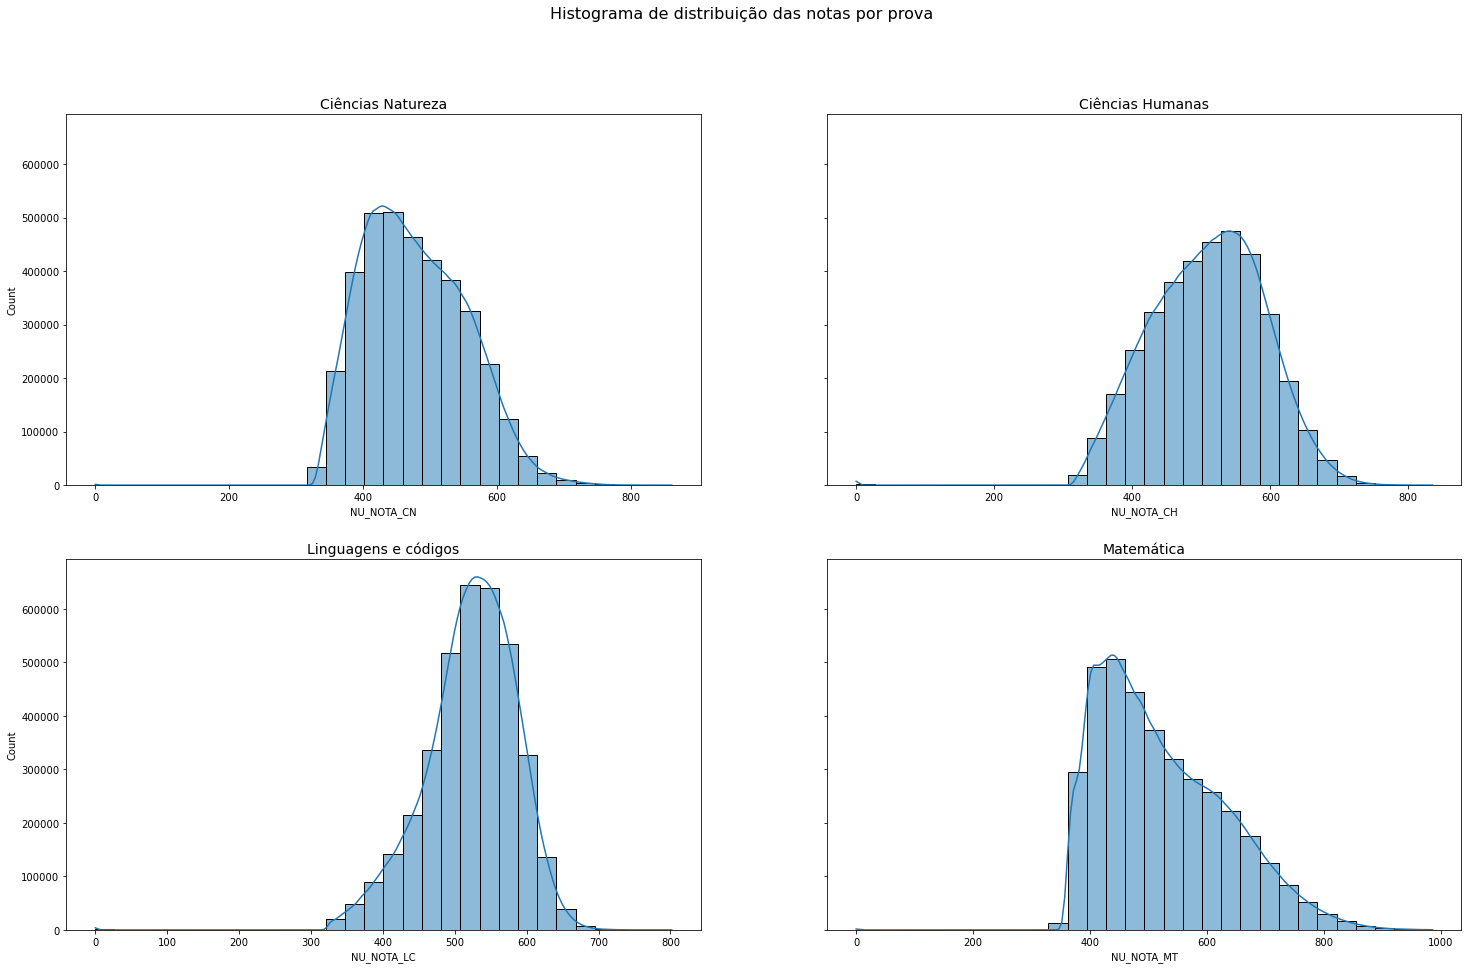

In [23]:
fig_hist, axes = plt.subplots(2, 2, figsize=(25, 15), sharey=True)
fig_hist.suptitle('Histograma de distribuição das notas por prova', fontsize = 16)

hist_cn = sns.histplot(ax = axes[0,0], data = PARTIC_ENEM_2019, x = "NU_NOTA_CN", kde = True, bins = 30)
hist_cn.set_title('Ciências Natureza', fontsize = 14)
hist_cn.set_label('Notas')
axes[0,0]

hist_ch = sns.histplot(ax = axes[0,1], data = PARTIC_ENEM_2019, x = "NU_NOTA_CH", kde = True, bins = 30)
hist_ch.set_title('Ciências Humanas', fontsize = 14)
hist_ch.set_label('Notas')
axes[0,1]

hist_lc = sns.histplot(ax = axes[1,0], data = PARTIC_ENEM_2019, x = "NU_NOTA_LC", kde = True, bins = 30)
hist_lc.set_title('Linguagens e códigos', fontsize = 14)
hist_lc.set_label('Notas')
axes[1,0]

hist_mt = sns.histplot(ax = axes[1,1], data = PARTIC_ENEM_2019, x = "NU_NOTA_MT", kde = True, bins = 30)
hist_mt.set_title('Matemática', fontsize = 14)
hist_mt.set_label('Notas')
axes[1,1]

fig_hist.savefig('fig_hist.jpeg')

# Médias por grupos

In [24]:
PARTIC_ENEM_2019.groupby(['TP_ESCOLA'])['NU_NOTA_MT'].mean() # Media por tipo de escola

TP_ESCOLA
1    522.794852
2    504.313977
3    619.791815
Name: NU_NOTA_MT, dtype: float64

In [25]:
PARTIC_ENEM_2019.groupby(['TP_ESCOLA'])['NU_NOTA_MT'].median() # Mediana por tipo de escola

TP_ESCOLA
1    500.7
2    485.2
3    628.9
Name: NU_NOTA_MT, dtype: float64

In [26]:
# Percentis por grupos

In [27]:
PARTIC_ENEM_2019.groupby(['TP_ESCOLA'])['NU_NOTA_CN'].quantile([0.25, 0.5, 0.75]) # Percentis conforme evolução da nota de matematica

TP_ESCOLA      
1          0.25    419.7
           0.50    472.4
           0.75    534.6
2          0.25    407.8
           0.50    452.9
           0.75    509.5
3          0.25    492.4
           0.50    551.6
           0.75    592.9
Name: NU_NOTA_CN, dtype: float64

In [28]:
PARTIC_ENEM_2019.NU_NOTA_CN.quantile([i/100 for i in range (1,100)])

0.01    344.9
0.02    352.2
0.03    357.8
0.04    362.6
0.05    366.8
        ...  
0.95    608.6
0.96    616.4
0.97    626.0
0.98    639.1
0.99    661.6
Name: NU_NOTA_CN, Length: 99, dtype: float64

In [29]:
# Box-plot notas ciencia da natureza (dados populacionais) para notas maioroes que zero

Neste item foi aplicado este filtro para eliminar os candidados faltantes. É importante destacar que para aplicação de testes estatísticos é necessária uma seleção de amostra aleatoria para realização de tais testes.  

<AxesSubplot:label='Notas', title={'center':'Box Plot - Notas'}, xlabel='NU_NOTA_CN', ylabel='TP_SEXO'>

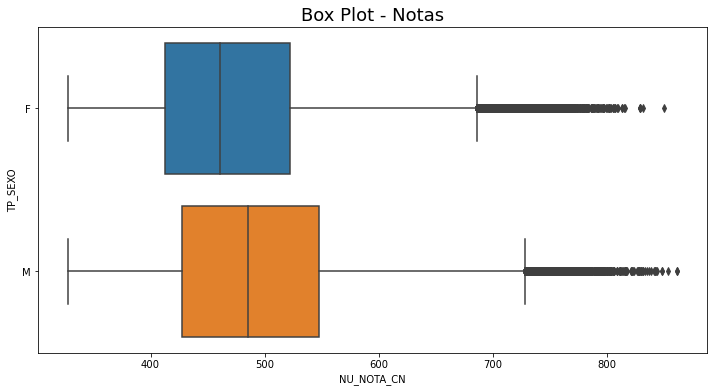

In [30]:
ax = sns.boxplot (x = 'NU_NOTA_CN', y = 'TP_SEXO', data = PARTIC_ENEM_2019.query('NU_NOTA_CN > 1'))
ax.figure.set_size_inches(12, 6)
ax.set_title('Box Plot - Notas', fontsize = 18)
ax.set_label('Notas')
ax

In [31]:
PARTIC_ENEM_2019.groupby(['TP_ESCOLA'])['NU_NOTA_MT'].var()

TP_ESCOLA
1    11973.713898
2     9019.013025
3    13740.225609
Name: NU_NOTA_MT, dtype: float64

In [32]:
PARTIC_ENEM_2019.groupby(['TP_ESCOLA'])['NU_NOTA_MT'].std()/PARTIC_ENEM_2019.groupby(['TP_ESCOLA'])['NU_NOTA_MT'].mean() # Coeficiente de variação

TP_ESCOLA
1    0.209307
2    0.188312
3    0.189126
Name: NU_NOTA_MT, dtype: float64

# Diferença na media das notas por sexo 

## Teste de normalidade

<div style="text-align: justify"> 
Serão analisadas as notas das 4 provas. Inicialmente, será executado os testes de Shapiro-Wilk e Anderson-Darling para verificar se as notas seguem uma distribuição normal. Para isso será selecionada uma amostra aleatoria com 100 notas de cada prova. 
</div>

In [33]:
from scipy.stats import normaltest

In [34]:
import scipy.stats as stats

In [35]:
significancia = 0.05 # Probabilidade do teste dar errado

In [36]:
AMOSTRA_ENEM = PARTIC_ENEM_2019.sample(n = 100) # É importante destacar que amostras muito grandes podem inviabilizar a aplicação de testes estatisticos. 

In [37]:
stat_test_sw_MT, p_valor_sw_MT = stats.shapiro(AMOSTRA_ENEM.NU_NOTA_MT)
stat_test_sw_CH, p_valor_sw_CH = stats.shapiro(AMOSTRA_ENEM.NU_NOTA_CH)
stat_test_sw_LC, p_valor_sw_LC = stats.shapiro(AMOSTRA_ENEM.NU_NOTA_LC)
stat_test_sw_CN, p_valor_sw_CN = stats.shapiro(AMOSTRA_ENEM.NU_NOTA_CN)
print(stat_test_sw_MT, p_valor_sw_MT)
print(stat_test_sw_CH, p_valor_sw_CH)
print(stat_test_sw_LC, p_valor_sw_LC)
print(stat_test_sw_CN, p_valor_sw_CN)

0.9417704343795776 0.0002476224326528609
0.9879064559936523 0.5013339519500732
0.9738855361938477 0.04415387660264969
0.9721224308013916 0.032205160707235336


<div style="text-align: justify"> 
Além dos testes estatisticos, é necessário verificar as medidas descritivas da amostra para identificar as caracteristicas da distribuição normal. Para isso, tem que ser analisado se a mediana está próxima a media, verificar se a distribuição das notas é assimétrica e se não apresenta curtose.
</div>

## Assimetria

In [38]:
print(stats.skew(AMOSTRA_ENEM.NU_NOTA_MT))
print(stats.skew(AMOSTRA_ENEM.NU_NOTA_CH))
print(stats.skew(AMOSTRA_ENEM.NU_NOTA_LC))
print(stats.skew(AMOSTRA_ENEM.NU_NOTA_CN))

0.7667831880355336
0.18006844853964743
-0.5907801631480342
0.3791780932648879


Caso os coeficientes de assimetria apresentem resultados positivos, significa que tem-se uma assimetria positiva. Logo, seus valores apresentam uma média superior à mediana. Além disso, há uma concentração maior de valores na parte direita do histograma.
Caso os coeficientes de assimetria apresentem resultados negativos, significa que tem-se uma assimetria negativa. Logo, seus valores apresentam uma média inferior à mediana. Além disso, há uma concentração maior de valores na parte esquerda do histograma. De todo modo, os resultados apresentados nos testes evidenciam uma aproximação proxima a zero, quando isto acontece há evidencias de que a amostra selecionada segue uma distribuição normal. 

## Curtose

In [39]:
print(stats.kurtosis(AMOSTRA_ENEM.NU_NOTA_MT, fisher = True))
print(stats.kurtosis(AMOSTRA_ENEM.NU_NOTA_CH, fisher = True))
print(stats.kurtosis(AMOSTRA_ENEM.NU_NOTA_LC, fisher = True))
print(stats.kurtosis(AMOSTRA_ENEM.NU_NOTA_CN, fisher = True))

0.02136876344609817
-0.3058666456611068
0.5556193188765226
-0.39488148558547076


As medidas de curtose apresentando valores próximos a zero demonstram que as amostras coletadas seguem uma distribuição normal. Entretanto, os resultados dos testes de normalidade para as notas de ciencia da natureza e de matemática não seguiriam uma distribuição normal. Para fins deste post, vamos considerar que as notas de matematica e de ciencas da natureza seguem uma distribuição normal por conta das caracteristicas encontradas nas medidas descritivas. Porém, seria interessante aplicar testes não parametricos para avaliar melhor este grupo de notas. 

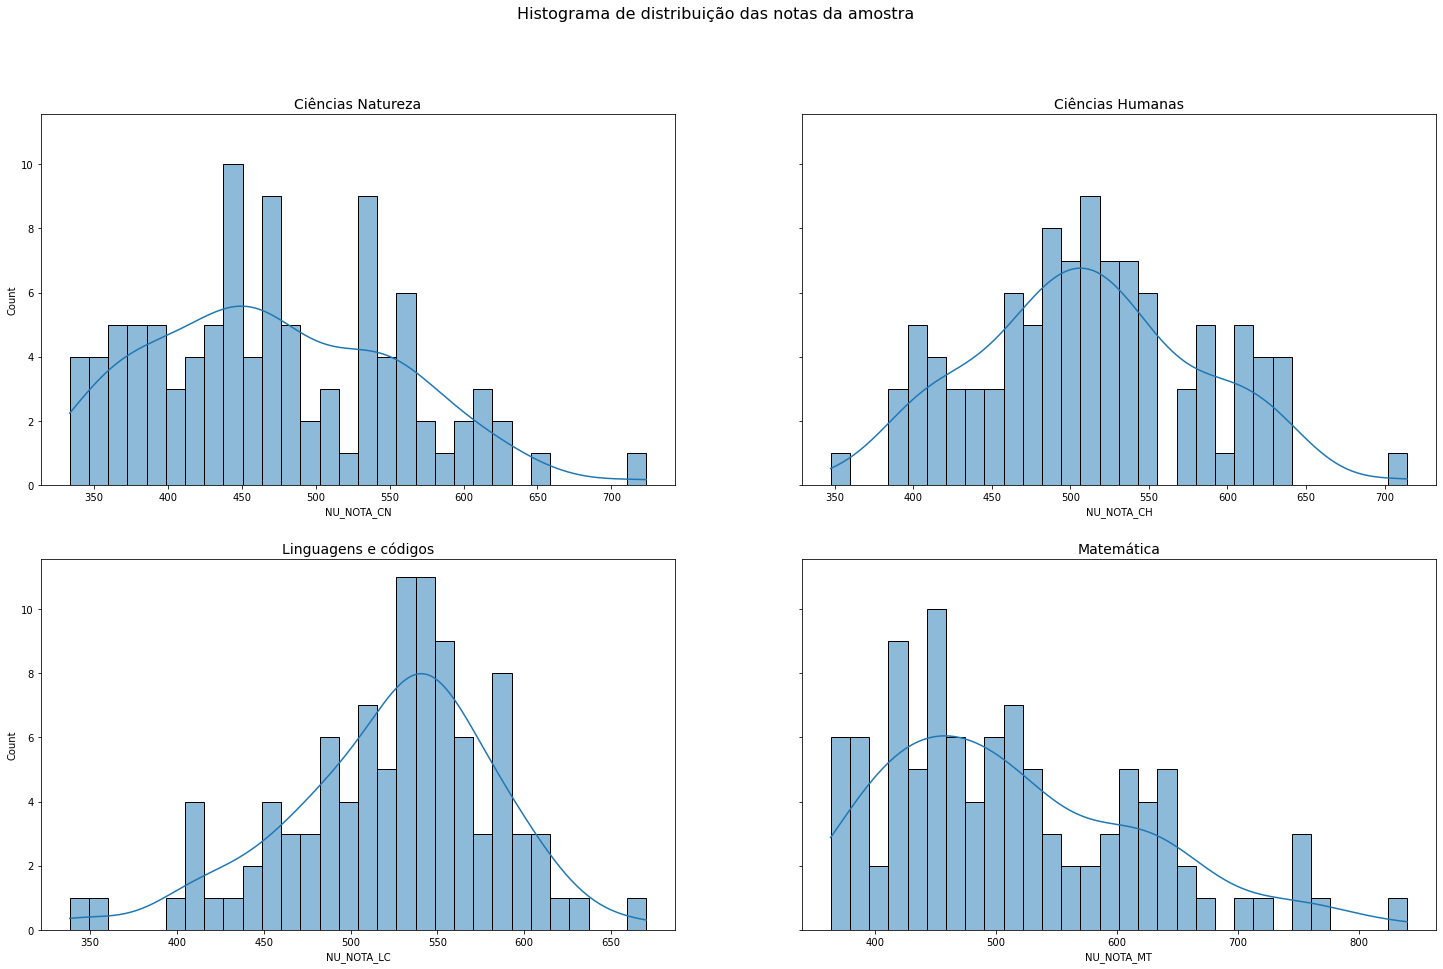

In [40]:
fig_hist_am, axes = plt.subplots(2, 2, figsize=(25, 15), sharey=True)
fig_hist_am.suptitle('Histograma de distribuição das notas da amostra', fontsize = 16)

hist_cn_am = sns.histplot(ax = axes[0,0], data = AMOSTRA_ENEM, x = "NU_NOTA_CN", kde = True, bins = 30)
hist_cn_am.set_title('Ciências Natureza', fontsize = 14)
hist_cn.set_label('Notas')
axes[0,0]

hist_ch_am = sns.histplot(ax = axes[0,1], data = AMOSTRA_ENEM, x = "NU_NOTA_CH", kde = True, bins = 30)
hist_ch_am.set_title('Ciências Humanas', fontsize = 14)
hist_ch_am.set_label('Notas')
axes[0,1]

hist_lc_am = sns.histplot(ax = axes[1,0], data = AMOSTRA_ENEM, x = "NU_NOTA_LC", kde = True, bins = 30)
hist_lc_am.set_title('Linguagens e códigos', fontsize = 14)
hist_lc_am.set_label('Notas')
axes[1,0]

hist_mt_am = sns.histplot(ax = axes[1,1], data = AMOSTRA_ENEM, x = "NU_NOTA_MT", kde = True, bins = 30)
hist_mt_am.set_title('Matemática', fontsize = 14)
hist_mt_am.set_label('Notas')
axes[1,1]

fig_hist_am.savefig('fig_hist.jpeg')

## Testes de variância

In [41]:
from scipy.stats import levene

In [42]:
import numpy as np
import pingouin as pg

In [43]:
levene_cn = pg.homoscedasticity(AMOSTRA_ENEM, dv="NU_NOTA_CN", group="TP_SEXO", method='levene', alpha=0.05)
levene_ch = pg.homoscedasticity(AMOSTRA_ENEM, dv="NU_NOTA_CH", group="TP_SEXO", method='levene', alpha=0.05)
levene_lc = pg.homoscedasticity(AMOSTRA_ENEM, dv="NU_NOTA_LC", group="TP_SEXO", method='levene', alpha=0.05)
levene_mt = pg.homoscedasticity(AMOSTRA_ENEM, dv="NU_NOTA_MT", group="TP_SEXO", method='levene', alpha=0.05)

C:\Users\helio\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.12, the latest is 0.4.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [44]:
print(levene_cn)
print(levene_ch)
print(levene_lc)
print(levene_mt)

               W    pval  equal_var
levene  0.564884  0.4541       True
               W      pval  equal_var
levene  5.007976  0.027495      False
               W      pval  equal_var
levene  1.671366  0.199115       True
               W      pval  equal_var
levene  0.393242  0.532058       True


In [45]:
print(stats.f_oneway(AMOSTRA_ENEM['NU_NOTA_CN'][AMOSTRA_ENEM['TP_SEXO'] == 'M'],
               AMOSTRA_ENEM['NU_NOTA_CN'][AMOSTRA_ENEM['TP_SEXO'] == 'F']))
print(stats.f_oneway(AMOSTRA_ENEM['NU_NOTA_MT'][AMOSTRA_ENEM['TP_SEXO'] == 'M'],
               AMOSTRA_ENEM['NU_NOTA_MT'][AMOSTRA_ENEM['TP_SEXO'] == 'F']))
print(stats.f_oneway(AMOSTRA_ENEM['NU_NOTA_LC'][AMOSTRA_ENEM['TP_SEXO'] == 'M'],
               AMOSTRA_ENEM['NU_NOTA_LC'][AMOSTRA_ENEM['TP_SEXO'] == 'F']))
print(stats.f_oneway(AMOSTRA_ENEM['NU_NOTA_CH'][AMOSTRA_ENEM['TP_SEXO'] == 'M'],
               AMOSTRA_ENEM['NU_NOTA_CH'][AMOSTRA_ENEM['TP_SEXO'] == 'F']))


F_onewayResult(statistic=1.4059487205918506, pvalue=0.23859712699418548)
F_onewayResult(statistic=0.8505930380634759, pvalue=0.3586496509475542)
F_onewayResult(statistic=0.38664485140164734, pvalue=0.5355122054886466)
F_onewayResult(statistic=0.13190054234860812, pvalue=0.7172517794431073)


<div style="text-align: justify"> 
Pelo resultado do teste ANOVA, verificou-se que não há diferença nas medias entre os alunos do sexo e feminino e masculino nas notas da prova de ciências da natureza, ciencias humanas e linguagens e códigos. Porém, há indicios de que as notas de matematica apresentam diferenças entre das notas dos alunos do sexo masculino e feminino. 
</div>

In [46]:
from matplotlib import pyplot as plt

## Análise por sexo baseado por tipo da escola

### Escola privada

Será selecionada uma amostra com 100 notas de alunos oriundos de escolas particulares para assim, compararmos as notas por sexo.
Os resultados apontam uma variabilidade das notas menor dos alunos de escola publica. Isso me causou surpresa pois imaginei inicialmente que a variabilidade seria menor para os alunos de escola privada.

In [47]:
PARTIC_ENEM_2019_PRIV = PARTIC_ENEM_2019[(PARTIC_ENEM_2019["TP_ESCOLA"] == 3)]

In [48]:
AMOSTRA_PRIV = PARTIC_ENEM_2019_PRIV.sample(n = 100)

In [49]:
levene_cn_priv = pg.homoscedasticity(AMOSTRA_PRIV, dv="NU_NOTA_CN", group="TP_SEXO", method='levene', alpha=0.05)
levene_ch_priv = pg.homoscedasticity(AMOSTRA_PRIV, dv="NU_NOTA_CH", group="TP_SEXO", method='levene', alpha=0.05)
levene_lc_priv = pg.homoscedasticity(AMOSTRA_PRIV, dv="NU_NOTA_LC", group="TP_SEXO", method='levene', alpha=0.05)
levene_mt_priv = pg.homoscedasticity(AMOSTRA_PRIV, dv="NU_NOTA_MT", group="TP_SEXO", method='levene', alpha=0.05)

In [50]:
print(levene_cn_priv)
print(levene_ch_priv)
print(levene_lc_priv)
print(levene_mt_priv)

               W      pval  equal_var
levene  1.999745  0.160495       True
               W      pval  equal_var
levene  1.853429  0.176507       True
               W      pval  equal_var
levene  0.000921  0.975853       True
               W     pval  equal_var
levene  0.330948  0.56642       True


In [51]:
print(stats.f_oneway(AMOSTRA_PRIV['NU_NOTA_CN'][AMOSTRA_PRIV['TP_SEXO'] == 'M'],
               AMOSTRA_PRIV['NU_NOTA_CN'][AMOSTRA_PRIV['TP_SEXO'] == 'F']))
print(stats.f_oneway(AMOSTRA_PRIV['NU_NOTA_MT'][AMOSTRA_PRIV['TP_SEXO'] == 'M'],
               AMOSTRA_PRIV['NU_NOTA_MT'][AMOSTRA_PRIV['TP_SEXO'] == 'F']))
print(stats.f_oneway(AMOSTRA_PRIV['NU_NOTA_LC'][AMOSTRA_PRIV['TP_SEXO'] == 'M'],
               AMOSTRA_PRIV['NU_NOTA_LC'][AMOSTRA_PRIV['TP_SEXO'] == 'F']))
print(stats.f_oneway(AMOSTRA_PRIV['NU_NOTA_CH'][AMOSTRA_PRIV['TP_SEXO'] == 'M'],
               AMOSTRA_PRIV['NU_NOTA_CH'][AMOSTRA_PRIV['TP_SEXO'] == 'F']))

F_onewayResult(statistic=0.09494273795066208, pvalue=0.7586390604014412)
F_onewayResult(statistic=2.052601433493837, pvalue=0.15512863478531666)
F_onewayResult(statistic=0.539239783075563, pvalue=0.4645013546905038)
F_onewayResult(statistic=0.9418625762344104, pvalue=0.3341885068496463)


### Escola pública

In [52]:
PARTIC_ENEM_2019_PUB = PARTIC_ENEM_2019[(PARTIC_ENEM_2019["TP_ESCOLA"] == 2)]

In [53]:
AMOSTRA_PUB = PARTIC_ENEM_2019_PUB.sample(n = 100)

In [54]:
levene_cn_pub = pg.homoscedasticity(AMOSTRA_PUB, dv="NU_NOTA_CN", group="TP_SEXO", method='levene', alpha=0.05)
levene_ch_pub = pg.homoscedasticity(AMOSTRA_PUB, dv="NU_NOTA_CH", group="TP_SEXO", method='levene', alpha=0.05)
levene_lc_pub = pg.homoscedasticity(AMOSTRA_PUB, dv="NU_NOTA_LC", group="TP_SEXO", method='levene', alpha=0.05)
levene_mt_pub = pg.homoscedasticity(AMOSTRA_PUB, dv="NU_NOTA_MT", group="TP_SEXO", method='levene', alpha=0.05)

In [55]:
print(levene_cn_pub)
print(levene_ch_pub)
print(levene_lc_pub)
print(levene_mt_pub)

               W      pval  equal_var
levene  0.025449  0.873581       True
               W      pval  equal_var
levene  1.023265  0.314237       True
               W      pval  equal_var
levene  0.082736  0.774231       True
               W      pval  equal_var
levene  1.114848  0.293627       True


In [56]:
print(stats.f_oneway(AMOSTRA_PUB['NU_NOTA_CN'][AMOSTRA_PUB['TP_SEXO'] == 'M'],
               AMOSTRA_PUB['NU_NOTA_CN'][AMOSTRA_PUB['TP_SEXO'] == 'F']))
print(stats.f_oneway(AMOSTRA_PUB['NU_NOTA_MT'][AMOSTRA_PUB['TP_SEXO'] == 'M'],
               AMOSTRA_PUB['NU_NOTA_MT'][AMOSTRA_PUB['TP_SEXO'] == 'F']))
print(stats.f_oneway(AMOSTRA_PUB['NU_NOTA_LC'][AMOSTRA_PUB['TP_SEXO'] == 'M'],
               AMOSTRA_PUB['NU_NOTA_LC'][AMOSTRA_PUB['TP_SEXO'] == 'F']))
print(stats.f_oneway(AMOSTRA_PUB['NU_NOTA_CH'][AMOSTRA_PUB['TP_SEXO'] == 'M'],
               AMOSTRA_PUB['NU_NOTA_CH'][AMOSTRA_PUB['TP_SEXO'] == 'F']))


F_onewayResult(statistic=2.492920008972987, pvalue=0.11758187073909375)
F_onewayResult(statistic=4.148807236280387, pvalue=0.044360597877130786)
F_onewayResult(statistic=0.5018516758189527, pvalue=0.48036930827602475)
F_onewayResult(statistic=2.7109789079954445, pvalue=0.10286310667247454)


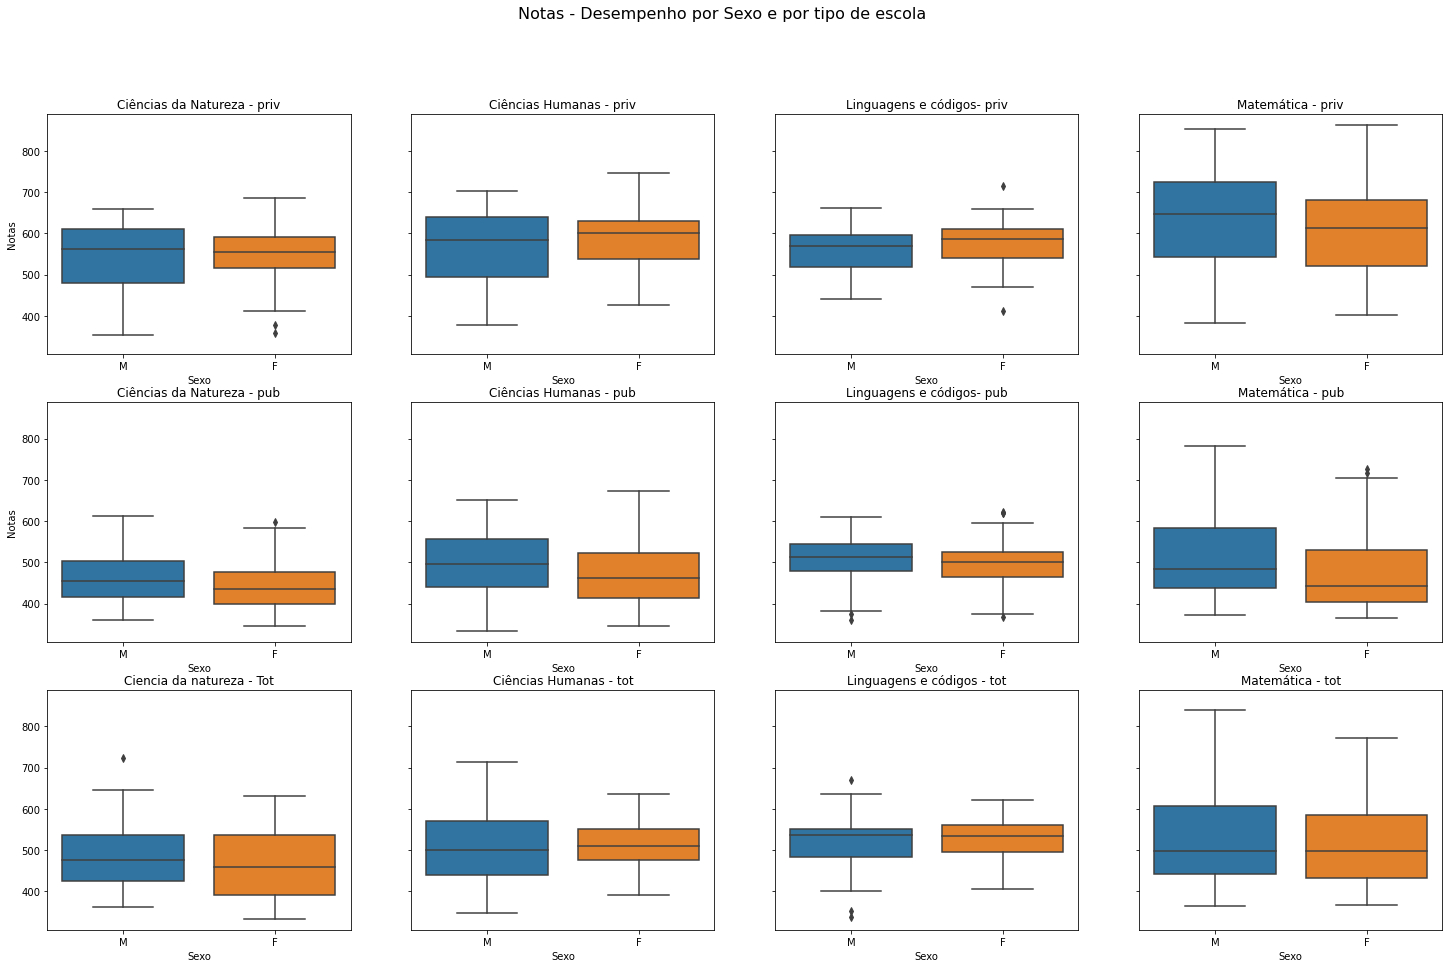

In [57]:
fig_tot, axes = plt.subplots(3, 4, figsize=(25, 15), sharey=True)
fig_tot.suptitle('Notas - Desempenho por Sexo e por tipo de escola', fontsize = 16)

plt_cn_priv = sns.boxplot(ax= axes[0,0], x='TP_SEXO', y='NU_NOTA_CN', data=AMOSTRA_PRIV, order=('M','F'))
plt_cn_priv.set_title('Ciências da Natureza - priv', fontsize = 12)
plt_cn_priv.set(xlabel='Sexo', ylabel = 'Notas')
axes[0,0]

plt_ch_priv = sns.boxplot(ax= axes[0,1], x='TP_SEXO', y='NU_NOTA_CH', data=AMOSTRA_PRIV, order=('M','F'))
plt_ch_priv.set_title('Ciências Humanas - priv', fontsize = 12)
plt_ch_priv.set(xlabel='Sexo', ylabel = '')
axes[0,1]

plt_lc_priv = sns.boxplot(ax= axes[0,2], x='TP_SEXO', y='NU_NOTA_LC', data=AMOSTRA_PRIV, order=('M','F'))
plt_lc_priv.set(xlabel='Sexo', ylabel = '')
plt_lc_priv.set_title('Linguagens e códigos- priv', fontsize = 12)
axes[0,2]

plt_mt_priv = sns.boxplot(ax= axes[0,3], x='TP_SEXO', y='NU_NOTA_MT', data=AMOSTRA_PRIV, order=('M','F'))
plt_mt_priv.set(xlabel='Sexo', ylabel = '')
plt_mt_priv.set_title('Matemática - priv', fontsize = 12)
axes[0,3]

plt_cn_pub = sns.boxplot(ax= axes[1,0], x='TP_SEXO', y='NU_NOTA_CN', data=AMOSTRA_PUB, order=('M','F'))
plt_cn_pub.set_title('Ciências da Natureza - pub', fontsize = 12)
plt_cn_pub.set(xlabel='Sexo', ylabel = 'Notas')
axes[1,0]

plt_ch_pub = sns.boxplot(ax= axes[1,1], x='TP_SEXO', y='NU_NOTA_CH', data=AMOSTRA_PUB, order=('M','F'))
plt_ch_pub.set_title('Ciências Humanas - pub', fontsize = 12)
plt_ch_pub.set(xlabel='Sexo', ylabel = '')
axes[1,1]

plt_lc_pub = sns.boxplot(ax= axes[1,2], x='TP_SEXO', y='NU_NOTA_LC', data=AMOSTRA_PUB, order=('M','F'))
plt_lc_pub.set(xlabel='Sexo', ylabel = '')
plt_lc_pub.set_title('Linguagens e códigos- pub', fontsize = 12)
axes[1,2]

plt_mt_pub = sns.boxplot(ax= axes[1,3], x='TP_SEXO', y='NU_NOTA_MT', data=AMOSTRA_PUB, order=('M','F'))
plt_mt_pub.set(xlabel='Sexo', ylabel = '')
plt_mt_pub.set_title('Matemática - pub', fontsize = 12)
axes[1,3]

plt_cn = sns.boxplot(ax= axes[2,0], x='TP_SEXO', y='NU_NOTA_CN', data=AMOSTRA_ENEM, order=('M','F'))
plt_cn.set(xlabel='Sexo', ylabel = '')
plt_cn.set_title('Ciencia da natureza - Tot', fontsize = 12)
axes[2,0]

plt_ch = sns.boxplot(ax= axes[2,1], x='TP_SEXO', y='NU_NOTA_CH', data=AMOSTRA_ENEM, order=('M','F'))
plt_ch.set_title('Ciências Humanas - tot', fontsize = 12)
plt_ch.set(xlabel='Sexo', ylabel = '')
axes[2,1]

plt_lc = sns.boxplot(ax= axes[2,2], x='TP_SEXO', y='NU_NOTA_LC', data=AMOSTRA_ENEM, order=('M','F'))
plt_lc.set(xlabel='Sexo', ylabel = '')
plt_lc.set_title('Linguagens e códigos - tot', fontsize = 12)
axes[2,2]

plt_mt = sns.boxplot(ax= axes[2,3], x='TP_SEXO', y='NU_NOTA_MT', data=AMOSTRA_ENEM, order=('M','F'))
plt_mt.set(xlabel='Sexo', ylabel = '')
plt_mt.set_title('Matemática - tot', fontsize = 12)
axes[2,3]

fig_tot.savefig('fig_tot.jpeg')

Nesta analise comparando o desempenho da escola publica com a escola privada pelo sexo, com o objetivo de verificar o desempenho de cada sexo pelo tipo de escola, verificou-se que tanto na escola publica quanto na escola privada alunos do sexo feminino e masculino apresentam o mesmo desempenho. A analise foi feita com um nivel de confiança de 95% baseado nos testes ANOVA e de levene. As medidas de pvalor não apresentaram resultados inferiores à 5%. Além disso, pela comparação dos box-plots é possível identificar o desempenho semelhantes de cada grupo. 

### Analise exclusiva por tipo de escola.

In [58]:
BASE_PRIV_PUB = pd.merge(PARTIC_ENEM_2019_PUB, PARTIC_ENEM_2019_PRIV, how = 'outer')

In [59]:
AMOSTRA_PRIV_PUB = BASE_PRIV_PUB.sample(n = 100)

In [60]:
levene_cn_esc = pg.homoscedasticity(AMOSTRA_PRIV_PUB, dv="NU_NOTA_CN", group="TP_ESCOLA", method='levene', alpha=0.05)
levene_ch_esc = pg.homoscedasticity(AMOSTRA_PRIV_PUB, dv="NU_NOTA_CH", group="TP_ESCOLA", method='levene', alpha=0.05)
levene_lc_esc = pg.homoscedasticity(AMOSTRA_PRIV_PUB, dv="NU_NOTA_LC", group="TP_ESCOLA", method='levene', alpha=0.05)
levene_mt_esc = pg.homoscedasticity(AMOSTRA_PRIV_PUB, dv="NU_NOTA_MT", group="TP_ESCOLA", method='levene', alpha=0.05)

In [61]:
print(levene_cn_esc)
print(levene_ch_esc)
print(levene_lc_esc)
print(levene_mt_esc)

               W      pval  equal_var
levene  0.140847  0.708252       True
               W      pval  equal_var
levene  0.500221  0.481081       True
               W      pval  equal_var
levene  0.404696  0.526157       True
               W      pval  equal_var
levene  0.387729  0.534942       True


In [62]:
print(stats.f_oneway(AMOSTRA_PRIV_PUB['NU_NOTA_CN'][AMOSTRA_PRIV_PUB['TP_ESCOLA'] == 2],
                AMOSTRA_PRIV_PUB['NU_NOTA_CN'][AMOSTRA_PRIV_PUB['TP_ESCOLA'] == 3]))

print(stats.f_oneway(AMOSTRA_PRIV_PUB['NU_NOTA_MT'][AMOSTRA_PRIV_PUB['TP_ESCOLA'] == 2],
                AMOSTRA_PRIV_PUB['NU_NOTA_MT'][AMOSTRA_PRIV_PUB['TP_ESCOLA'] == 3]))

print(stats.f_oneway(AMOSTRA_PRIV_PUB['NU_NOTA_LC'][AMOSTRA_PRIV_PUB['TP_ESCOLA'] == 2],
                      AMOSTRA_PRIV_PUB['NU_NOTA_LC'][AMOSTRA_PRIV_PUB['TP_ESCOLA'] == 3]))

print(stats.f_oneway(AMOSTRA_PRIV_PUB['NU_NOTA_CH'][AMOSTRA_PRIV_PUB['TP_ESCOLA'] == 2],
                AMOSTRA_PRIV_PUB['NU_NOTA_CH'][AMOSTRA_PRIV_PUB['TP_ESCOLA'] == 3]))  


F_onewayResult(statistic=23.50060860224381, pvalue=4.6897354746719765e-06)
F_onewayResult(statistic=21.180528204534664, pvalue=1.2536108150687766e-05)
F_onewayResult(statistic=12.039334579951014, pvalue=0.0007758758313850668)
F_onewayResult(statistic=24.27162281341181, pvalue=3.3992494660014646e-06)


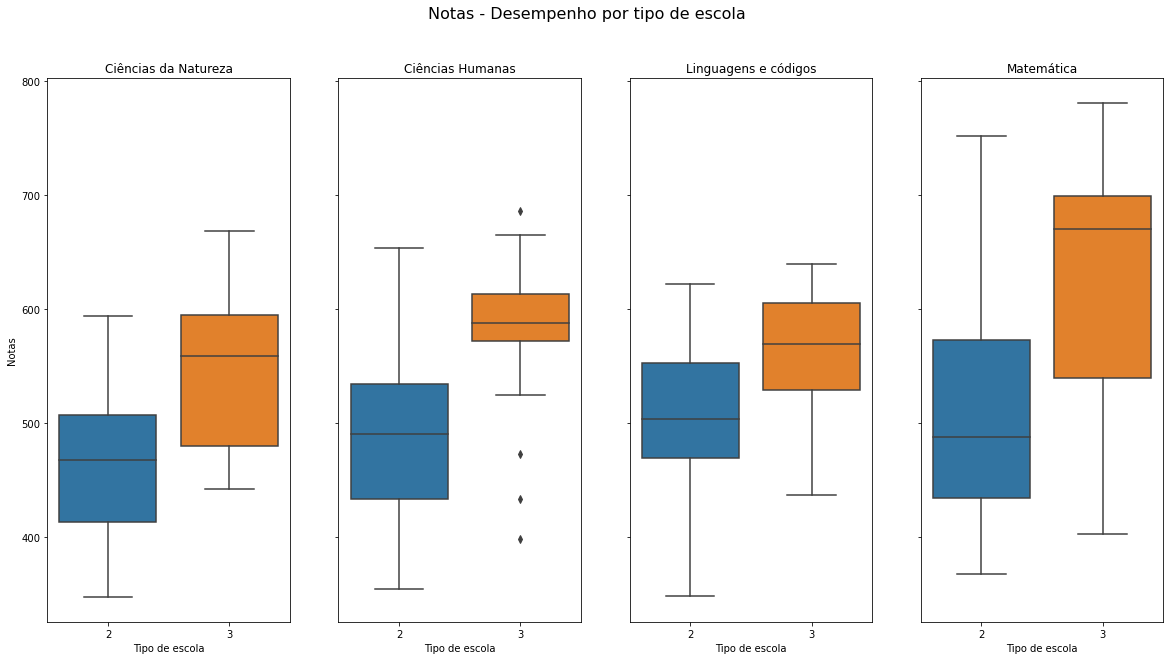

In [63]:
fig_esc, axes = plt.subplots(1, 4, figsize=(20, 10), sharey=True)
fig_esc.suptitle('Notas - Desempenho ppor tipo de escola', fontsize = 16)

plt_cn_esc = sns.boxplot(ax= axes[0], x='TP_ESCOLA', y='NU_NOTA_CN', data=AMOSTRA_PRIV_PUB)
plt_cn_esc.set_title('Ciências da Natureza', fontsize = 12)
plt_cn_esc.set(xlabel='Tipo de escola', ylabel = 'Notas')
axes[0]

plt_ch_esc = sns.boxplot(ax= axes[1], x='TP_ESCOLA', y='NU_NOTA_CH', data=AMOSTRA_PRIV_PUB)
plt_ch_esc.set_title('Ciências Humanas', fontsize = 12)
plt_ch_esc.set(xlabel='Tipo de escola', ylabel = '')
axes[1]

plt_lc_esc = sns.boxplot(ax= axes[2], x='TP_ESCOLA', y='NU_NOTA_LC', data=AMOSTRA_PRIV_PUB)
plt_lc_esc.set(xlabel='Tipo de escola', ylabel = '')
plt_lc_esc.set_title('Linguagens e códigos', fontsize = 12)
axes[2]

plt_mt_esc = sns.boxplot(ax= axes[3], x='TP_ESCOLA', y='NU_NOTA_MT', data=AMOSTRA_PRIV_PUB)
plt_mt_esc.set(xlabel='Tipo de escola', ylabel = '')
plt_mt_esc.set_title('Matemática', fontsize = 12)
axes[3]

fig_esc.savefig('fig_esc.jpeg')

Conforme evidenciado tanto no teste anova quanto até mesmo na analise dos box-plots, as médias apresentadas nas escolas privadas são diferentes das médias obtidas nas escolas publicas. O pvalor apresentado no anova foi inferior a 5% em todas as provas, demonstrando que a media das escolas privadas são diferentes das obtidas na escola publica. Na analise grafica é possóvel identicar que as notas das escolas privadas são superiores.  